# Experimenting with cv2 events

In [1]:
import cv2
import numpy as np
def draw_circle(event,x,y,flags,param):
    global mouseX,mouseY
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),20,(255,0,0),-1)
        mouseX,mouseY = x,y
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(20) & 0xFF
    if k == 27:
        break
    elif k == ord('a'):
        print (mouseX,mouseY)
cv2.destroyAllWindows()

175 126


In [19]:
import cv2
import numpy as np

def draw_cross(img, x, y):
    cv2.line(img, (x - 10, y), (x + 10, y), (0, 255, 0), 2)
    cv2.line(img, (x, y - 10), (x, y + 10), (0, 255, 0), 2)

def display_patches(image, points, patch_size=32):
    patches = []
    for point in points:
        x, y = point
        patch = image[y - patch_size//2:y + patch_size//2, x - patch_size//2:x + patch_size//2]
        patches.append(cv2.resize(patch, (128, 128)))  # Resize patches to fit the window

    num_patches = len(patches)

    if num_patches == 1:
        grid = patches[0]
    elif num_patches % 2 == 0:
        grid = np.vstack([np.hstack(patches[i:i+2]) for i in range(0, num_patches, 2)])
    else:
        grid = np.vstack([np.hstack(patches[i:i+2]) for i in range(0, num_patches-1, 2)])
        grid = np.vstack([grid,np.hstack([patches[-1],np.zeros_like(patches[0])])])

    cv2.imshow('Patches Grid', cv2.resize(grid, (512, 512)))

img = cv2.imread('C:/Users/sourj/Downloads/IMG-20231223-WA0011.jpg')  # Replace with the actual path to your image
img = cv2.resize(img, (620, 512))  # Resize main image to 512x512
copy_img = img.copy()
points = []

def mouse_callback(event, x, y, flags, param):
    global points
    if event == cv2.EVENT_LBUTTONDBLCLK:
        points.append((x, y))
        draw_cross(img, x, y)
        display_patches(copy_img, points)  # Display patches without the cross

cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(20) & 0xFF

    if k == 27:  # Escape key
        break

cv2.destroyAllWindows()




# Application (Functional Only)

In [5]:
import cv2
import numpy as np

def generate_mask(patch):
    mask = np.ones((patch.shape),np.uint8)
    return mask

def draw_cross(img, x, y):
    cv2.line(img, (x - 10, y), (x + 10, y), (0, 255, 0), 2)
    cv2.line(img, (x, y - 10), (x, y + 10), (0, 255, 0), 2)

def display_patches(image, points, patch_size=32):
    patches = []
    masks = []
    if not points:
        return np.zeros((img_size, img_size, 3), dtype=np.uint8) 
    for point in points:
        x, y = point
        patch = image[y - patch_size//2:y + patch_size//2, x - patch_size//2:x + patch_size//2]
        mask = generate_mask(patch)
        masks.append(cv2.resize(mask, (128, 128)))
        patches.append(cv2.resize(patch, (128, 128)))  # Resize patches to fit the window

    num_patches = len(patches)

    if num_patches == 1:
        grid = patches[0]
    elif num_patches % 2 == 0:
        grid = np.vstack([np.hstack(patches[i:i+2]) for i in range(0, num_patches, 2)])
        if(num_patches==2):
            grid = np.vstack([grid,np.hstack([np.zeros_like(patches[0]),np.zeros_like(patches[0])])])

    else:
        grid = np.vstack([np.hstack(patches[i:i+2]) for i in range(0, num_patches-1, 2)])
        grid = np.vstack([grid,np.hstack([patches[-1],np.zeros_like(patches[0])])])

    #cv2.imshow('Patches Grid', cv2.resize(grid, (512, 512)))
    return cv2.resize(grid, (img_size, img_size))

def overlay_masks(image, points, mask_size):
    if not points:
        return np.zeros((img_size,img_size,3), dtype=np.uint8) 
    overlay = image.copy()
    for point in points:
        x, y = point
        mask = np.zeros((mask_size, mask_size, 3), dtype=np.uint8)
        mask[:, :, 2] = 255  # Set red channel to 255 (red color)
        overlay[y - mask_size//2:y + mask_size//2, x - mask_size//2:x + mask_size//2] = mask

    #cv2.imshow('Overlay Masks', overlay)
    return overlay
#img = cv2.imread('C:/Users/sourj/Downloads/IMG-20231223-WA0011.jpg')  # Replace with the actual path to your image
img_size = 512
img = cv2.imread(sample_path)
img = cv2.resize(img, (img_size,img_size))  # Resize main image to 512x512
copy_img = img.copy()
points = []

patch_size = 64  # Adjust the patch size as needed
mask_size = 64  # Adjust the mask size as needed

def mouse_callback(event, x, y, flags, param):
    global points
    if event == cv2.EVENT_LBUTTONDBLCLK:
        points.append((x, y))
        draw_cross(img, x, y)
        display_patches(copy_img, points, patch_size)  # Display patches without the cross
        overlay_masks(copy_img, points, mask_size)  # Overlay masks on the original image

#cv2.namedWindow('image')
#cv2.setMouseCallback('image', mouse_callback)
        
cv2.namedWindow('Combined Windows')
cv2.setMouseCallback('Combined Windows', mouse_callback)

while True:
    #cv2.imshow('image', img)
    combined_image = np.hstack((img, display_patches(copy_img, points, patch_size), overlay_masks(copy_img, points, mask_size)))
    cv2.imshow('Combined Windows', combined_image)
    k = cv2.waitKey(20) & 0xFF

    if k == 27:  # Escape key
        break

cv2.destroyAllWindows()


# Collecting Data

In [5]:
# This script generates a table which maps the entries in the "Balanced lung cancer dataset"...this dataset has got only two classes: [Benign, Malignant, Normal]
import os
from tqdm import tqdm
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# Define the paths to the directories
malignant_images_path = 'E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/Malignant/images_new/'
malignant_masks_path = 'E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/Malignant/mask_new/'
benign_images_path = "E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/Benign_new/images/"
benign_masks_path  = "E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/Benign_new/masks/"
normal_images_path = 'E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/Normal/'

# Initialize lists to store the data
data = {'Image_Path': [], 'Mask_Path': [], 'Label': []}

# Retrieve the paths and labels for the malignant images and masks
malignant_images = os.listdir(malignant_images_path)
malignant_masks = os.listdir(malignant_masks_path)

# Creates table for the malignant images and masks
for image in tqdm(malignant_images):
    image_path = os.path.join(malignant_images_path, image)
    mask_path = os.path.join(malignant_masks_path, image) if image in malignant_masks else None
    data['Image_Path'].append(image_path)
    data['Mask_Path'].append(mask_path)
    data['Label'].append(2)  # Label 1 for malignant
    
benign_images = os.listdir(benign_images_path)
benign_masks = os.listdir(benign_masks_path)

# Creates table for the benign images and masks
for image in tqdm(benign_images):
    image_path = os.path.join(benign_images_path, image)
    mask_path = os.path.join(benign_masks_path, image) if image in benign_masks else None
    data['Image_Path'].append(image_path)
    data['Mask_Path'].append(mask_path)
    data['Label'].append(1)  # Label 1 for malignant

# Creates table for the normal images
normal_images = os.listdir(normal_images_path)
for image in tqdm(normal_images):
    image_path = os.path.join(normal_images_path, image)
    data['Image_Path'].append(image_path)
    data['Mask_Path'].append(None)  # No mask for normal images
    data['Label'].append(0)  # Label 0 for normal

# Create a Pandas DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
#print(df.head(5))

100%|██████████| 416/416 [00:00<00:00, 203692.56it/s]


In [6]:
sample_path = df[df["Label"]==1]["Image_Path"][600]

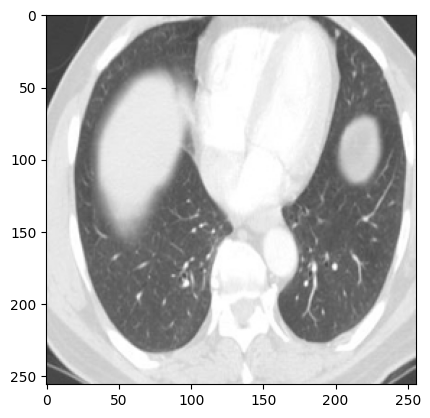

In [20]:
#sanity check
import matplotlib.pyplot as plt
sample_image=cv2.imread(df[df["Label"]==1]["Image_Path"][600])
plt.imshow(sample_image)

# Generating patch Training Data for the auxilliary network

In [16]:
import cv2
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to extract positive pixel clusters and calculate centroids
def extract_and_crop(image_path, mask_path, label, save_folder_image, save_folder_mask):
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) if mask_path is not None else None
    mask = (mask/np.max(mask) >=0.5).astype(np.uint8)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for i, contour in enumerate(contours):
        # Calculate centroid of the contour
        M = cv2.moments(contour)
        if M["m00"] == 0:
            continue  # Skip contours with no area
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # Crop 32 by 32 patches around the centroid
        patch_size = 32
        start_x = max(0, cX - patch_size // 2)
        end_x = min(image.shape[1], cX + patch_size // 2)
        start_y = max(0, cY - patch_size // 2)
        end_y = min(image.shape[0], cY + patch_size // 2)

        # Save the patches
        image_patch = image[start_y:end_y, start_x:end_x]
        mask_patch = mask[start_y:end_y, start_x:end_x] if mask is not None else None

        # Save the patches only if they are within the image boundaries
        if image_patch.size > 0 and mask_patch.size > 0:
            image_save_path = os.path.join(save_folder_image, "cropped_image_"+image_path.split(".")[0].split("/")[-1]+".png")
            mask_save_path = os.path.join(save_folder_mask, "cropped_mask_"+image_path.split(".")[0].split("/")[-1]+".png")
            """plt.imshow(image_patch)
            plt.show()
            plt.imshow(mask_patch)
            plt.show()"""

            #break

            cv2.imwrite(image_save_path, image_patch)
            cv2.imwrite(mask_save_path, mask_patch)

# Paths and directories
save_folder_image = "E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/cropped_benign_images_32"
save_folder_mask = "E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/cropped_benign_masks_32"

# Create directories if not exist
os.makedirs(save_folder_image, exist_ok=True)
os.makedirs(save_folder_mask, exist_ok=True)

# Iterate through the DataFrame and process each row
for index, row in tqdm(df.iterrows(), total=len(df)):
    image_path = row['Image_Path']
    mask_path = row['Mask_Path']
    label = row['Label']

    # Process only rows with Label == 1
    if label == 1 and mask_path is not None:
        extract_and_crop(image_path, mask_path, label, save_folder_image, save_folder_mask)


100%|██████████| 1608/1608 [00:02<00:00, 568.22it/s]


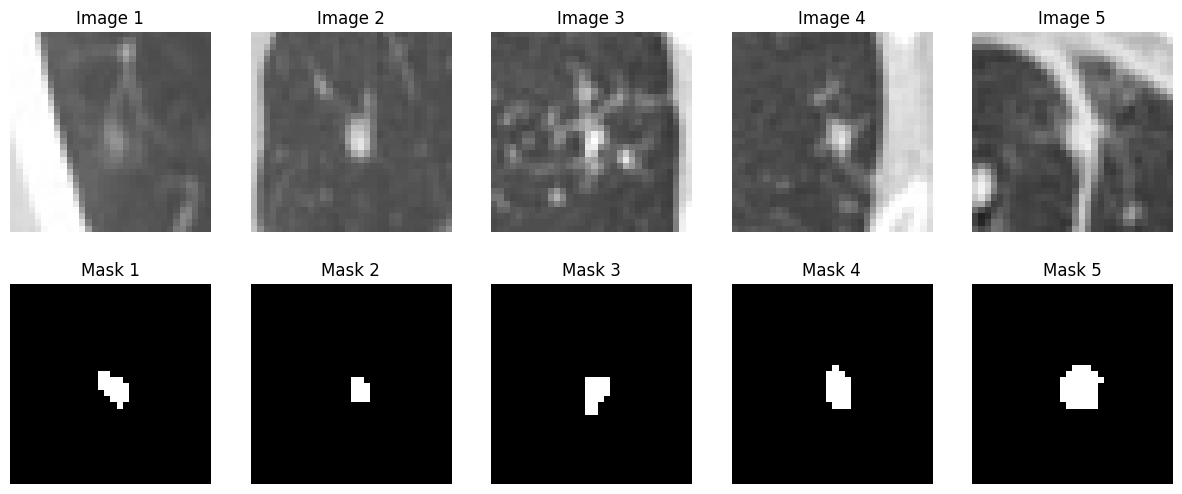

In [17]:
#sanity check
import os
import cv2
import matplotlib.pyplot as plt
import random

# Function to display images and masks
def display_images(images, masks):
    plt.figure(figsize=(15, 6))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Image {i+1}')
        plt.axis('off')
        

        plt.subplot(2, 5, i + 6)
        plt.imshow(masks[i], cmap='gray')
        plt.title(f'Mask {i+1}')
        plt.axis('off')
        
    plt.grid()
    plt.show()

# Folder paths for cropped benign images and masks
benign_images_folder = "E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/cropped_benign_images_32"
benign_masks_folder = "E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/cropped_benign_masks_32"

cropped_benign_image_paths = os.listdir(benign_images_folder)
cropped_benign_mask_paths = os.listdir(benign_masks_folder)

# Randomly select 5 samples
random_benign_image_paths = random.sample(cropped_benign_image_paths, 5)
random_benign_mask_paths = [path.replace('cropped_image_', 'cropped_mask_') for path in random_benign_image_paths]

# Read 5 random images and masks
benign_images = [cv2.imread(os.path.join(benign_images_folder, f)) for f in random_benign_image_paths]
benign_masks = [cv2.imread(os.path.join(benign_masks_folder, f), cv2.IMREAD_GRAYSCALE) for f in random_benign_mask_paths]

# Display the randomly selected images and masks
display_images(benign_images, benign_masks)

In [28]:
import os
import pandas as pd

# Folder paths
cropped_images_folder = "E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/cropped_benign_images_32"
cropped_masks_folder = "E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/cropped_benign_masks_32"

# Get the list of image and mask files
image_files = os.listdir(cropped_images_folder)
mask_files = os.listdir(cropped_masks_folder)
data = []

# Iterate through image files and add paths to the DataFrame
for image_file in tqdm(image_files):
    image_path = os.path.join(cropped_images_folder, image_file)
    mask_file = image_file.replace("cropped_image_", "cropped_mask_")  # Assuming naming convention
    mask_path = os.path.join(cropped_masks_folder, mask_file)

    # Check if the corresponding mask file exists
    if mask_file in mask_files:
                data.append({'Image_Path': image_path, 'Mask_Path': mask_path})

# Create a DataFrame from the list of dictionaries
df_paths = pd.DataFrame(data)


100%|██████████| 592/592 [00:00<00:00, 83634.61it/s]


In [29]:
len(df_paths)

592

In [30]:
from sklearn.model_selection import train_test_split

df_shuffled = df_paths.sample(frac=1, random_state=42)

# Split the data into training and testing sets
train_df, test_df = train_test_split(df_shuffled,test_size=0.2, random_state=42)

In [40]:
#for multiclass
import cv2
import numpy as np
import albumentations as A
from tensorflow.keras.utils import Sequence
from sklearn.preprocessing import MinMaxScaler
from scipy import ndimage


class CustomDataGenerator(Sequence):
    def __init__(self, df, batch_size, image_size, shuffle=True,gray=True):
        self.df = df
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.gray=gray
        self.on_epoch_end()
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            #A.RandomBrightnessContrast(p=0.2),
            A.Rotate(limit=10, p=0.3)
        ])

    def __len__(self):
        return int(np.ceil(len(self.df) / float(self.batch_size)))

    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)

    def __getitem__(self, index):
        batch_df = self.df[index * self.batch_size : (index + 1) * self.batch_size]

        images = []
        masks = []

        for i, row in batch_df.iterrows():
            if self.gray==True:
                image = cv2.imread(row['Image_Path'], cv2.IMREAD_GRAYSCALE)
                #image = CLAHE(image)
            else:
                image = cv2.imread(row['Image_Path'], cv2.IMREAD_COLOR)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, self.image_size)
            #shape = image.shape
            #image = scaler.fit_transform(image.reshape(-1, shape[-1])).reshape(shape)
            image = image/np.max(image)
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            mask_path = row['Mask_Path']
            if mask_path:
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                mask = cv2.resize(mask, self.image_size)
                #mask=mask/np.max(mask)
                #mask[mask>0.7]=1
                #mask[mask>0.1]=1
            else:
                mask = np.zeros(self.image_size, dtype=np.uint8)

    
            augmented = self.transform(image=image, mask=mask)
            images.append(augmented['image'])
            masks.append(augmented['mask'])
                

        #images = np.expand_dims(np.array(images, dtype=np.float32), axis=-1)
        images = np.expand_dims(np.array(images, dtype=np.float32),axis=-1)
        masks = np.expand_dims(np.array(masks, dtype=np.float32), axis=-1)
        
        

        
        return  images, masks

# Example usage of the CustomDataGenerator
train_generator = CustomDataGenerator(train_df, batch_size=8, image_size=(32, 32), shuffle=True, gray=True)

(8, 32, 32, 1)


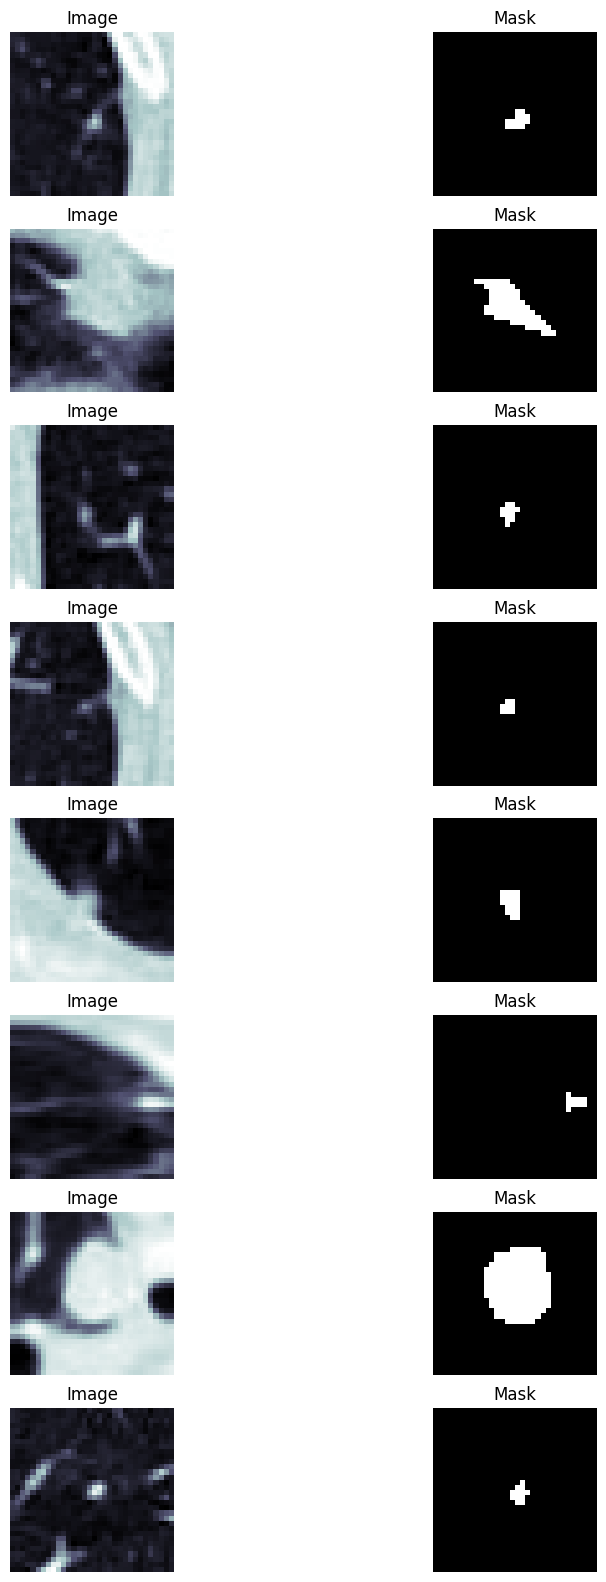

In [42]:
#Sanity check
import matplotlib.pyplot as plt

# Load a single batch
batch = train_generator[0]  # Assuming you want to load the first batch

# Extract images and labels from the batch
images, masks = batch
print(images.shape)
# Display the images and masks
n_images_to_display = len(images)
fig, ax = plt.subplots(n_images_to_display, 2, figsize=(10, 20))
for i in range(n_images_to_display):
    #print(images[i].shape,masks[i].shape)
    #print(np.max(images[i]),np.max(masks[i]))
    ax[i, 0].imshow(images[i], cmap='bone')
    ax[i, 0].grid(True, linestyle='--', linewidth=1, color='white')
    ax[i, 0].set_title('Image')
    ax[i, 1].imshow(masks[i], cmap='bone')
    ax[i, 1].grid(True, linestyle='--', linewidth=1, color='white')
    ax[i, 1].set_title('Mask')
    

    ax[i, 0].axis('off')
    ax[i, 1].axis('off')

plt.show()

# Auxilliary network architecture

In [43]:
#Architecture for Residual_UNet with DWT pooling
from tensorflow.keras.layers import Conv2D,Conv2DTranspose, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate, Input, ZeroPadding2D,Dropout,Dense,MaxPooling2D,Reshape,Multiply,GlobalAveragePooling2D,LeakyReLU
from tensorflow.keras.models import Model
import pywt
from keras.layers import Lambda

def batchnorm_relu(inputs):
    x = BatchNormalization(axis=-1)(inputs)
    #x = Activation("relu")(x)
    x = LeakyReLU(alpha=0.1)(x)
    return x

def residual_block(inputs, num_filters):
    # Convolutional Layer 
    inp = batchnorm_relu(inputs)
    x = Conv2D(num_filters, 3, padding="same", strides=1,kernel_initializer = "he_normal")(inp)
    x = Dropout(0.1)(x)
    x = batchnorm_relu(x)
    x = Conv2D(num_filters, 3, padding="same", strides=1,kernel_initializer = "he_normal")(x)

    # Shortcut Connection
    s = Conv2D(num_filters, 1, padding="same", strides=1,kernel_initializer="he_normal")(inp)
    
    return Concatenate(axis=-1)([x,s])

def decoder_block(inputs, skip_features, num_filters,attention=True):
    x = Conv2DTranspose(num_filters,2, strides=(2,2), kernel_initializer="he_normal",padding = "same")(inputs)
    x = Concatenate()([x, skip_features])
    x = residual_block(x, num_filters)
    return x


def build_aux_net(input_shape):
    inputs = Input(input_shape)
    
    #integrating augmentation directly into the model
    #x = tf.keras.layers.RandomContrast(0.15)(inputs)
    #x = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)(x)
    #x = tf.keras.layers.RandomFlip("horizontal_and_vertical")(x)
    #x_ = tf.keras.layers.RandomZoom(0.3)(x)
    f = [16,32,64]

    """ Encoder 1 """
    x = Conv2D(f[0], 3, padding="same", strides=1,kernel_initializer="he_normal")(inputs)
    x = batchnorm_relu(x)
    x = Conv2D(f[0], 3, padding="same", strides=1,kernel_initializer="he_normal")(x)

    s = Conv2D(f[0], 1, padding="same", strides=1,kernel_initializer="he_normal")(inputs)
    
    c1 = Concatenate(axis=-1)([x,s])
    p1 = MaxPooling2D((2,2))(c1)
    s1 = c1

    """ Encoder 2 and 3 """
    c2 = residual_block(p1, f[1])
    p2 = MaxPooling2D((2,2))(c2)
    s2 = c2
    
    c3 = residual_block(p2, f[2])
    p3 = MaxPooling2D((2,2))(c3)
    s3 = c3

    """ Bridge """
    b = residual_block(p3,128)


    """ Decoder 1, 2, 3 """
    d1 = decoder_block(b, s3, f[2])
    d2 = decoder_block(d1, s2, f[1])
    d3 = decoder_block(d2, s1, f[0])


    """ Seg_Output """
    segmentation_output = Conv2D(1, 1, padding="same", activation="sigmoid",name = 'segmentation_output')(d3)

    model = Model(inputs=inputs, outputs=segmentation_output, name="aux_model")
    return model

# Metrics for evaluation

In [2]:
from keras import backend as K
epsilon = 1e-5
smooth = 1e-5

def dice_coeff(y_true, y_pred, smooth=1):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_true_flatten * y_pred_flatten)
    dice = (2. * intersection + smooth) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) + smooth)
    return dice
def dice_loss(y_true, y_pred, smooth=1):
    return  1- dice_coeff(y_true, y_pred, smooth=1)

def FocalLoss(targets, inputs, alpha=0.75, gamma=2):    
    
    inputs = K.flatten(inputs)
    targets = K.flatten(targets)
    
    BCE = K.binary_crossentropy(targets, inputs)
    BCE_EXP = K.exp(-BCE)
    focal_loss = K.mean(alpha * K.pow((1-BCE_EXP), gamma) * BCE)
    
    return focal_loss

def total_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return dice_loss(y_true, y_pred, smooth=1) + FocalLoss(y_true, y_pred, 0.25,2)
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

def iou(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true + y_pred, axis=[1, 2, 3]) - intersection
    iou = (intersection + 1e-7) / (union + 1e-7)
    return iou

In [45]:
from tensorflow.keras.optimizers import Adam
# Build the model
input_shape = (32,32,1)  # Assuming Gray channel images
model = build_aux_net(input_shape)

In [46]:
# Compile the model
model.compile(optimizer=Adam(lr=1e-3),
              loss=total_loss,
              metrics=[dice_coeff,iou,sensitivity,specificity])

c:\Users\sourj\anaconda3\envs\py310_tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [47]:
model.summary()

Model: "aux_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 16)   160         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 16)  64          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 32, 32, 16)   0           ['batch_normalization[0][

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
import keras

csv_logger = CSVLogger('E:/D/Datasets/Balanced_lung_tumor_dataset/Training_logs/Training_log_aux_net', separator=',', append=False)


callbacks = [
      keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.00001,
                             patience=9, verbose=1, mode='auto'),
      keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                              patience=4, min_lr=0.00001, verbose=1),
      keras.callbacks.ModelCheckpoint(filepath = 'E:/D/Datasets/Balanced_lung_tumor_dataset/Training_logs/aux_model.h5',
                              verbose=1, save_best_only=True,save_weights_only = True),
      csv_logger
    ]


In [51]:
import tensorflow as tf
train_generator = CustomDataGenerator(train_df, batch_size=8, image_size=(32, 32), shuffle=True,gray=True)
val_generator = CustomDataGenerator(test_df, batch_size=8, image_size=(32, 32), shuffle=False,gray=True)

# Train the model
num_epochs = 50  # Define the number of epochs
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=num_epochs,
                    callbacks = callbacks,
                    verbose=1)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.5661 - dice_coeff: 0.4470 - iou: 0.3171 - sensitivity: 0.6237 - specificity: 0.9512
Epoch 1: val_loss improved from inf to 0.81520, saving model to E:/D/Datasets/Balanced_lung_tumor_dataset/Training_logs\aux_model.h5
60/60 [==============================] - 23s 190ms/step - loss: 0.5661 - dice_coeff: 0.4470 - iou: 0.3171 - sensitivity: 0.6237 - specificity: 0.9512 - val_loss: 0.8152 - val_dice_coeff: 0.2262 - val_iou: 0.1318 - val_sensitivity: 0.9179 - val_specificity: 0.9001 - lr: 0.0010
Epoch 2/50
58/60 [============================>.] - ETA: 0s - loss: 0.3536 - dice_coeff: 0.6683 - iou: 0.5072 - sensitivity: 0.7119 - specificity: 0.9903
Epoch 2: val_loss improved from 0.81520 to 0.56316, saving model to E:/D/Datasets/Balanced_lung_tumor_dataset/Training_logs\aux_model.h5
60/60 [==============================] - 2s 25ms/step - loss: 0.3540 - dice_coeff: 0.6679 - iou: 0.5044 - sensitivity: 0.7097 - specificity: 0.99

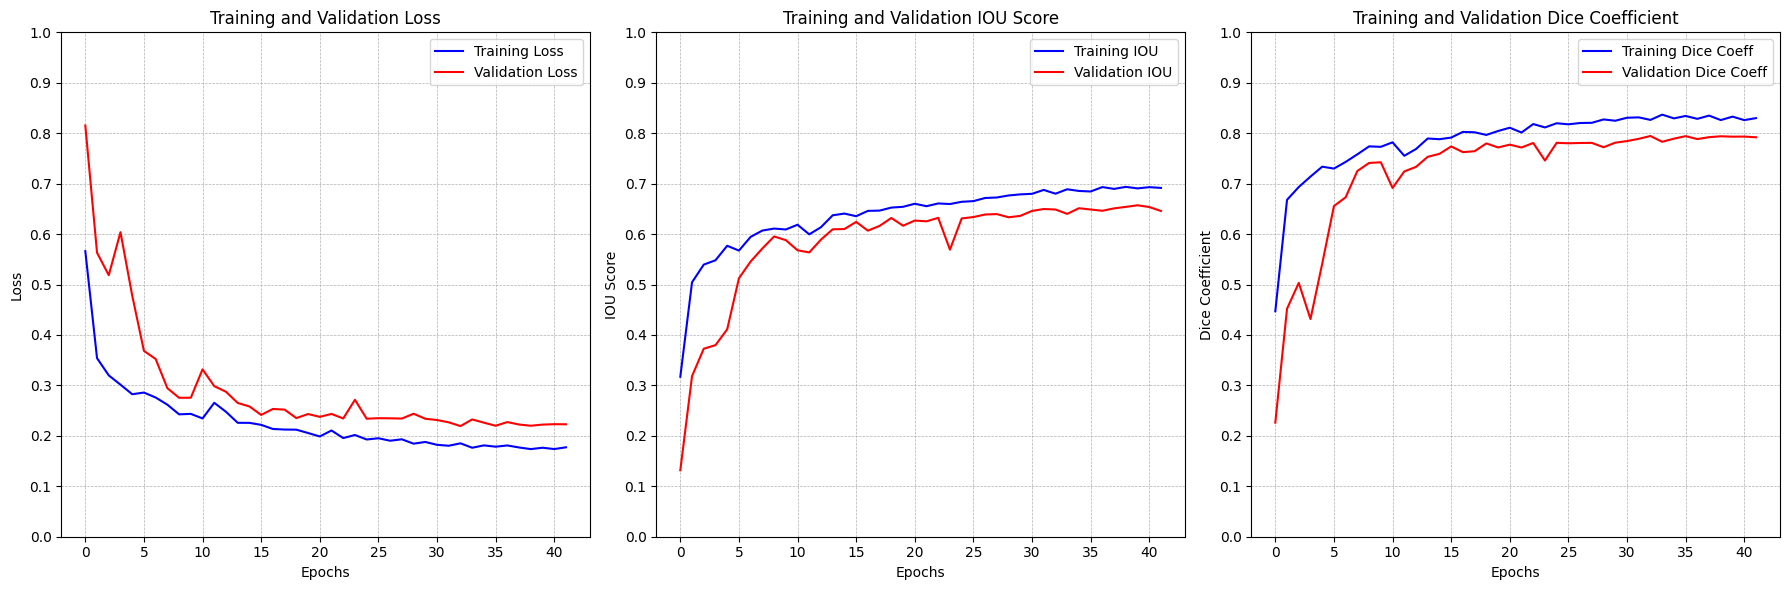

In [45]:
from matplotlib import pyplot as plt
import pandas as pd
history = pd.read_csv('E:/D/Datasets/Balanced_lung_tumor_dataset/Training_logs/Training_log_aux_net', sep=',', engine='python')

#history= history

############### ########## ####### #######

iou_score=history['iou']
val_iou_score=history['val_iou']

loss=history['loss']
val_loss=history['val_loss']

train_dice=history['dice_coeff']
val_dice=history['val_dice_coeff']

epoch = np.arange(len(loss))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)  # Adjust the space between subplots

# Plot 1: Loss
axes[0].plot(epoch, loss, 'b', label='Training Loss', linewidth=1.5)
axes[0].plot(epoch, val_loss, 'r', label='Validation Loss', linewidth=1.5)
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()

# Plot 2: IOU Scores
axes[1].plot(epoch, iou_score, 'b', label='Training IOU', linewidth=1.5)
axes[1].plot(epoch, val_iou_score, 'r', label='Validation IOU', linewidth=1.5)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('IOU Score')
axes[1].set_title('Training and Validation IOU Score')
axes[1].legend()

# Plot 3: Dice Coefficients
axes[2].plot(epoch, train_dice, 'b', label='Training Dice Coeff', linewidth=1.5)
axes[2].plot(epoch, val_dice, 'r', label='Validation Dice Coeff', linewidth=1.5)
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Dice Coefficient')
axes[2].set_title('Training and Validation Dice Coefficient')
axes[2].legend()

# Customize tick marks and labels
for ax in axes:
    ax.grid(True)
    ax.set_xticks(np.arange(0, len(epoch), 5))  # Adjust the x-axis ticks
    ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adjust the y-axis ticks
    ax.grid(which='both', linestyle='--', linewidth=0.5)

# Display the plots
plt.tight_layout()
plt.show()

In [52]:
model.save('E:/D/Datasets/Balanced_lung_tumor_dataset/Training_logs/aux_model_final.h5')

# Loading saved model

In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model

custom_objects = {'total_loss': total_loss,
                  'iou':iou,
                  'dice_coeff':dice_coeff,
                  'sensitivity':sensitivity,
                  'specificity':specificity
                 }

with tf.keras.utils.custom_object_scope(custom_objects):
    aux_model = load_model('E:/D/Datasets/Balanced_lung_tumor_dataset/Training_logs/aux_model_final.h5')

# Testing Application

In [1]:
sample_path = "C:/Users/sourj/Downloads/IMG-20231223-WA0011.jpg"

In [4]:
sample_path = "E:/D/Datasets/Balanced_lung_tumor_dataset/Dataset - Copy/Benign_new/images/000001Resized.jpg"

In [46]:
import cv2
import numpy as np

def generate_patch(image, patch_size, x, y):
    # Calculate half of the patch size
    half_patch = patch_size // 2
    
    # Determine the valid range for row and column indices
    if(y+half_patch>image.shape[0]):
        y_start = image.shape[0] - patch_size
        y_end = image.shape[0]
    elif(y-half_patch<0):
        y_start = 0
        y_end = patch_size
    else:
        y_start =  y - half_patch
        y_end =  y + half_patch

    if(x+half_patch>image.shape[1]):
        x_start = image.shape[1] - patch_size
        x_end = image.shape[1]
    elif(x-half_patch<0):
        x_start = 0
        x_end = patch_size
    else:
        x_start = x - half_patch
        x_end =  x + half_patch
    
    patch = image[y_start:y_end, x_start:x_end]
    return patch

def generate_overlay(overlay,image,patch_pred,patch_size,x,y):
    half_patch = patch_size // 2
    
    # Determine the valid range for row and column indices
    # Determine the valid range for row and column indices
    if(y+half_patch>image.shape[0]):
        y_start = image.shape[0] - patch_size
        y_end = image.shape[0]
    elif(y-half_patch<0):
        y_start = 0
        y_end = patch_size
    else:
        y_start =  y - half_patch
        y_end =  y + half_patch

    if(x+half_patch>image.shape[1]):
        x_start = image.shape[1] - patch_size
        x_end = image.shape[1]
    elif(x-half_patch<0):
        x_start = 0
        x_end = patch_size
    else:
        x_start = x - half_patch
        x_end =  x + half_patch

    overlay[y_start:y_end, x_start:x_end] = np.where(patch_pred>0,patch_pred, overlay[y_start:y_end, x_start:x_end])
    return overlay

def generate_countour(mask,patch):
    contours, _ = cv2.findContours(mask*255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = np.zeros_like(patch)
    cv2.drawContours(contour_image, contours, -1, (255,0,255), thickness=1)
    patch = np.where(contour_image>0,contour_image, patch)
    return patch


def preprocess_patch(patch):
    patch = cv2.resize(patch,(32,32))
    patch  = cv2.cvtColor(patch,cv2.COLOR_BGR2GRAY)
    patch = patch/np.max(patch)
    patch = np.expand_dims(patch,axis=[0,-1])
    return patch

def generate_mask(patch,aux_model):
    patch = preprocess_patch(patch)
    pred = np.squeeze(np.squeeze(aux_model.predict(patch),axis=0),axis=-1)
    pred = cv2.resize(pred,(64,64))
    return (pred>=0.3).astype(np.uint8)

def draw_cross(img, x, y):
    if not points:
        return 
    cv2.line(img, (x - 10, y), (x + 10, y), (0, 255, 0), 2)
    cv2.line(img, (x, y - 10), (x, y + 10), (0, 255, 0), 2)

def crop_patch_overlay(image, points, patch_size=64,mask_size=64):
    patches = []
    masks = []
    overlay = (image.copy()/1.5).astype(np.uint8)
    if not points:
        return np.zeros((img_size, img_size, 3), dtype=np.uint8),np.zeros((img_size, img_size, 3), dtype=np.uint8)
    for point in points:
        x, y = point
        patch = generate_patch(image,patch_size,x,y)
        mask = generate_mask(patch,aux_model)
        mask_contour = generate_countour(mask,patch)
        mask = np.stack([np.zeros((64,64),np.uint8),mask*255,np.zeros((64,64),np.uint8)],axis=-1)

        #mask = np.zeros((patch_size,patch_size,3),np.uint8)
        #mask[:, :, 2] =  (mask[:, :, 2]*255)

        
        #overlay[y - mask_size//2:y + mask_size//2, x - mask_size//2:x + mask_size//2] = np.where(mask>0,mask, overlay[y - mask_size//2:y + mask_size//2, x - mask_size//2:x + mask_size//2])
        #masks.append(cv2.resize(mask, (128, 128)))
        #overlay = np.clip(overlay, 0, 255).astype(np.uint8)
        overlay = generate_overlay(overlay,image,mask,patch_size,x,y)
        patches.append(cv2.resize(mask_contour, (128, 128)))  # Resize patches to fit the window

    num_patches = len(patches)

    if num_patches == 1:
        grid = patches[0]
    elif num_patches % 2 == 0:
        grid = np.vstack([np.hstack(patches[i:i+2]) for i in range(0, num_patches, 2)])
        if(num_patches==2):
            grid = np.vstack([grid,np.hstack([np.zeros_like(patches[0]),np.zeros_like(patches[0])])])

    else:
        grid = np.vstack([np.hstack(patches[i:i+2]) for i in range(0, num_patches-1, 2)])
        grid = np.vstack([grid,np.hstack([patches[-1],np.zeros_like(patches[0])])])

    #cv2.imshow('Patches Grid', cv2.resize(grid, (512, 512)))
    return cv2.resize(grid, (img_size, img_size)),overlay

#img = cv2.imread('C:/Users/sourj/Downloads/IMG-20231223-WA0011.jpg')  # Replace with the actual path to your image
img_size = 512
img = cv2.imread(sample_path)
img = cv2.resize(img, (img_size,img_size))  # Resize main image to 512x512
copy_img = img.copy()
points = []
masks = []
patches = []
patch_size = 64  # Adjust the patch size as needed
mask_size = 64  # Adjust the mask size as needed

def mouse_callback(event, x, y, flags, param):
    global points
    if event == cv2.EVENT_LBUTTONDBLCLK:
        points.append((x, y))
        draw_cross(img, x, y)
        #crop_patch_overlay(copy_img, points, patch_size,mask_size)  # Display patches without the cross
        #overlay_masks(copy_img, points, mask_size)  # Overlay masks on the original image
        combined_image = np.hstack((img, crop_patch_overlay(copy_img, points, patch_size,mask_size)[0],crop_patch_overlay(copy_img, points, patch_size,mask_size)[1]))
        cv2.imshow('Combined Windows', combined_image)

#cv2.namedWindow('image')
#cv2.setMouseCallback('image', mouse_callback)
        
cv2.imshow('Combined Windows', np.hstack([img,np.zeros_like(img),np.zeros_like(img)])) 
cv2.namedWindow('Combined Windows')
cv2.setMouseCallback('Combined Windows', mouse_callback)
k = cv2.waitKey()
if k == 27:
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 34ms/step


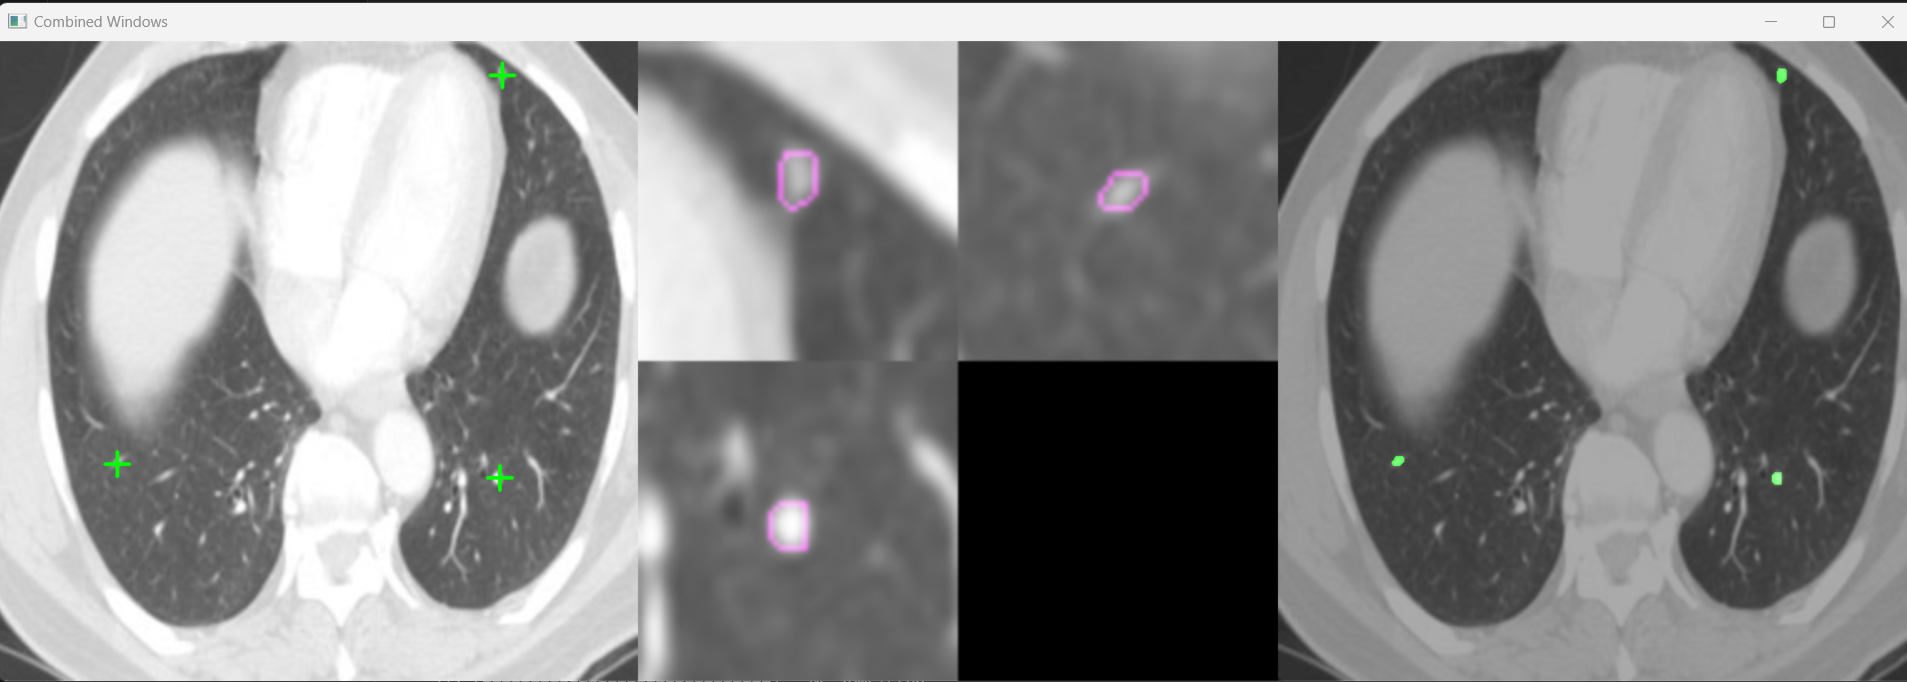